<a href="https://colab.research.google.com/github/paulohenriquegf/portifolio_DS/blob/master/EDA%20-%20Predict%20(People%20Analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SOBRE O PROJETO**

Projeto de People Analitycs proposto e disponibilizado pela **EmpowerData : Business Inteligence & Analitycs**, onde :


Os sócios da empresa desejam manter um quadro de funcionários de até 210
integrantes, mas a preocupação atual é entender o que pode estar acontecendo,
visto que o turnover da empresa está muito elevado em comparação com a
média do mercado (5%).

Este indicador está associado à rotatividade de contratação e demissão de
funcionários de uma empresa. Uma alta taxa de rotatividade gera uma série de
custos adicionais e impactos organizacionais dentro da empresa (demissão,
treinamento, instabilidade no ambiente de trabalho, etc..).

Diante deste cenário, foi solicitada uma apresentação geral do quadro de
funcionários da empresa bem como uma análise das possíveis causas de
demissão.

**IMPORTANTE**: Este é apenas um exercício prático para desenvolver a
capacidade analítica. **Todos os dados utilizados são fictícios**.

Todo o projeto será utilizando a linguagem de programação PYTHON e suas bibliotecas de apoio. 

Este projeto consiste em Análise Exploratória dos Dados (EDA) e Predict (DecisionTreeClassifier)

# START

Importando a bibliotecas do python que serão utilizadas.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




from datetime import date


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importando com a biblioteca Pandas a base que iremos trabalhar

In [3]:
df = pd.read_excel('/content/drive/My Drive/Data Science/Estudo   Modelos/Datasets/People Analytics/Softx Database.xlsx')

In [ ]:
df.head()

,Nome do Empregado,ID,PerfScoreID,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Data de Contratação,Data de Saída,Motivo Saída,Status do Integrante,Departamento,Fonte Recrutamento,Registro de Performance,Pesquisa de Engajamento,Índice de Satisfação,SpecialProjectsCount,Última atualização de Performance
0,Isis,1304055947,4,5060,Técnico de Produção I,1982-05-21,F,Solteiro,2015-09-01,NaT,N/A - Empregado,Ativo,Produção,Site da Empresa,Acima do Esperado,5.00,5.0,0,2016-12-01
1,Emanuel,1109029366,3,3520,Técnico de Produção I,1975-12-21,M,Solteiro,2015-02-03,NaT,N/A - Empregado,Ativo,Produção,Indicação Funcionários,Dentro do Esperado,5.00,3.0,0,2016-12-01
2,Vinícius,1501072124,1,4400,Técnico de Produção I,1972-04-17,M,Casado(a),2017-07-06,NaT,N/A - Empregado,Ativo,Produção,Site de Vagas,Abaixo do esperado,1.12,2.0,0,2016-12-01
3,João Guilherme,1302053339,1,3960,Técnico de Produção I,1994-10-17,M,Casado(a),2018-11-04,NaT,N/A - Empregado,Ativo,Produção,Site de Vagas,Abaixo do esperado,1.56,4.0,0,2016-12-01
4,Luna,1204032927,4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,2017-09-28,NaT,N/A - Empregado,Ativo,Produção,Feira de Contratação,Acima do Esperado,3.39,4.0,0,2016-12-01


A base possui 310 linhas e 19 colunas

In [ ]:
df.shape

(310, 19)

Verificando valores faltantes

In [ ]:
df.isna().sum()

Nome do Empregado                      0
ID                                     0
PerfScoreID                            0
Salário Mensal Corrigido               0
Cargo                                  0
Data de Nascimento                     0
Sexo                                   0
Estado Civil                           0
Data de Contratação                    0
Data de Saída                        207
Motivo Saída                           0
Status do Integrante                   0
Departamento                           0
Fonte Recrutamento                     0
Registro de Performance                0
Pesquisa de Engajamento                0
Índice de Satisfação                   0
SpecialProjectsCount                   0
Última atualização de Performance    103
dtype: int64

Criando novas bases filtrando separadamente com os Status "Ativo", "Desligamento" e "Demitido"

In [ ]:
ativos = df[df['Status do Integrante'] == 'Ativo']
desligamento = df[df['Status do Integrante'] == 'Solicitou desligamento']
demitido = df[df['Status do Integrante'] == 'Demitido']

Transformando a coluna "Data de Contratação" para o formato DATA

In [ ]:
df['Data de Contratação'] =  pd.to_datetime(df['Data de Contratação'], format='%d/%m/%Y')
now = date.today()

Definindo a paleta de cores que iremos utilizar

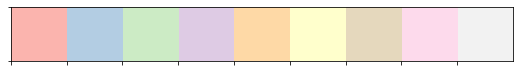

In [ ]:
current_palette = sns.color_palette('Pastel1')
sns.palplot(current_palette)

 # VISÃO GERAL: 
- Quantos funcionários ativos existem na empresa atualmente?
- Qual o custo mensal de folha de pagamento desta empresa? 
- Qual percentual de homens e mulheres que trabalham na empresa?
- Qual é a principal fonte de recrutamento da empresa? Dos integrantes ativos qual percentual foi com base em indicação de funcionários?
- Com base na última avaliação de performance, qual percentual de funcionários ativos que ficaram abaixo do esperado? 
- Dos profissionais ativos, qual é a média de tempo em anos que trabalham nesta empresa?
- Qual departamento representou maior grau de satisfação na última pesquisa realizada? 
- Podemos afirmar que existe uma correlação entre o índice de satisfação dos funcionários com o salário?


### Quantos funcionários ativos existem na empresa atualmente?

A empresa possui 207 funcionários ativos

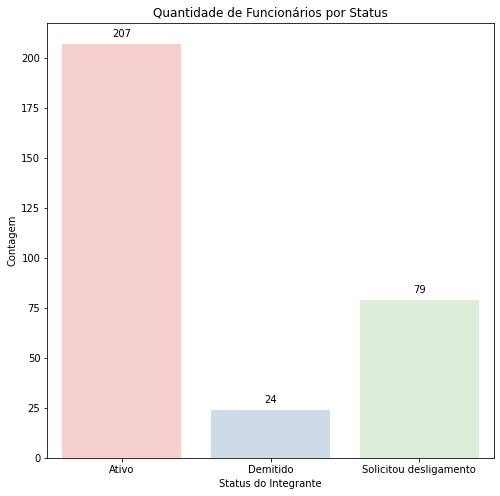

In [ ]:
plt.figure(figsize=(8,8))
splot = sns.countplot(x=df['Status do Integrante'], palette = current_palette, alpha=.7)
plt.title('Quantidade de Funcionários por Status')
plt.ylabel('Contagem')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


Dos ativos, são 117 mulheres e 90 homens

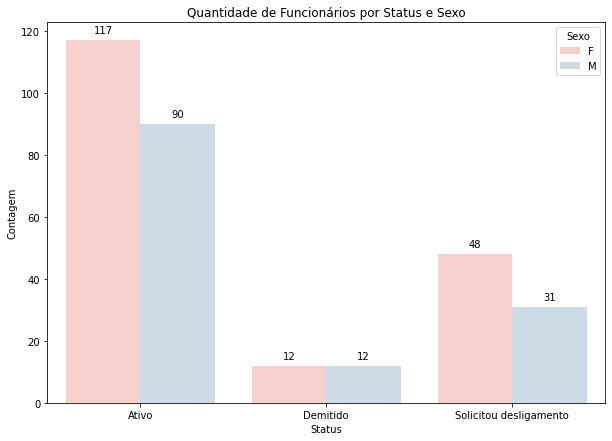

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x=df['Status do Integrante'],hue=df['Sexo'], palette = current_palette,alpha=.7)
plt.title('Quantidade de Funcionários por Status e Sexo')
plt.xlabel('Status')
plt.ylabel('Contagem')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


### Qual o custo mensal de folha de pagamento desta empresa?

A empresa empresa possui custo mensal de 1.392.870,00

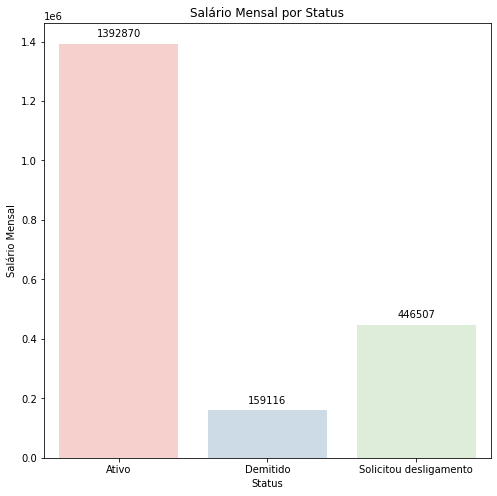

In [ ]:
plt.figure(figsize=(8,8))
splot = sns.barplot(x='Status do Integrante', y= 'Salário Mensal Corrigido', data=df.groupby('Status do Integrante')['Salário Mensal Corrigido'].sum().reset_index(), palette = current_palette, alpha=.7)
plt.title('Salário Mensal por Status')
plt.xlabel('Status')
plt.ylabel('Salário Mensal')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Dos 1.392.870,00 mensais, abaixo o gráfico de distribuição deste valor por Departamento.

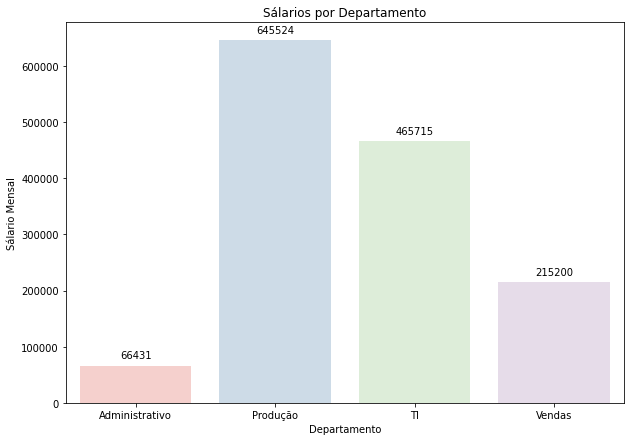

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.barplot(x='Departamento', y= 'Salário Mensal Corrigido', data=ativos.groupby('Departamento')['Salário Mensal Corrigido'].sum().reset_index(), palette = current_palette,alpha=.7)
plt.title('Sálarios por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Sálario Mensal')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Qual percentual de homens e mulheres que trabalham na empresa?

A empresa possui 117 mulheres e 90 homens, sendo 56,5% mulheres e 43,5% homens.

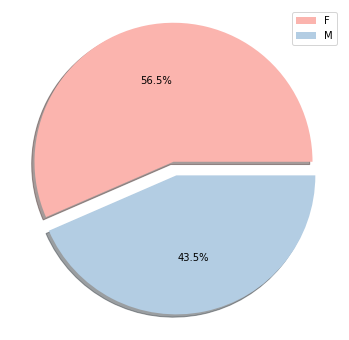

In [ ]:
plt.figure(figsize=(6,6))
explode = (0.1, 0) 

plt.pie(ativos['Sexo'].value_counts(), autopct='%1.1f%%', shadow=True, explode=explode, colors=['#fbb4ae','#b3cde3'])
plt.legend(ativos['Sexo'], loc=1)


# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.show()

Sexo feminino possui melhor desempenho.

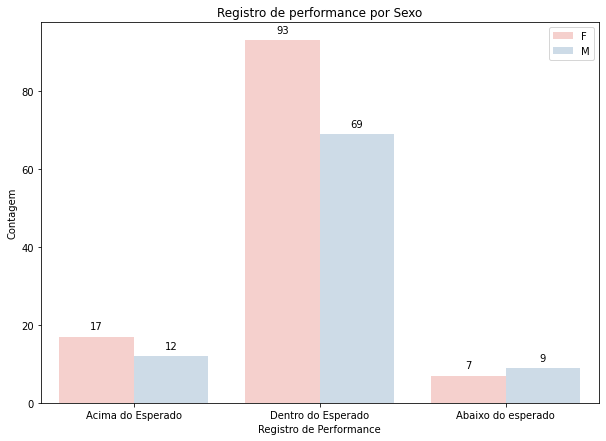

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x= ativos['Registro de Performance '], hue=ativos['Sexo'], palette = current_palette, alpha=.7)
plt.legend(loc='upper right')
plt.title('Registro de performance por Sexo')
plt.xlabel('Registro de Performance')
plt.ylabel('Contagem')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Em média, o salário do sexo masculino é maior

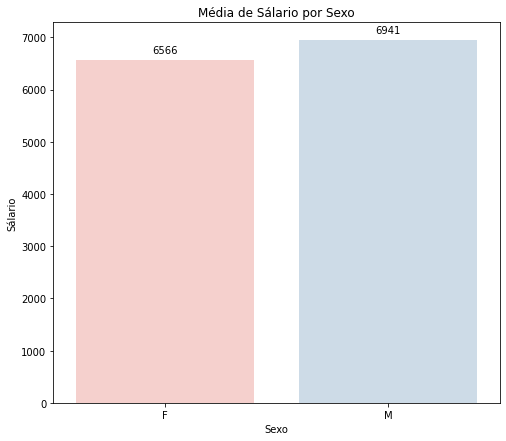

In [ ]:
plt.figure(figsize=(8,7))
splot = sns.barplot(x='Sexo', y= 'Salário Mensal Corrigido', data=ativos.groupby('Sexo')['Salário Mensal Corrigido'].mean().reset_index(), palette = current_palette, alpha=.7)
plt.title('Média de Sálario por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Sálario')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

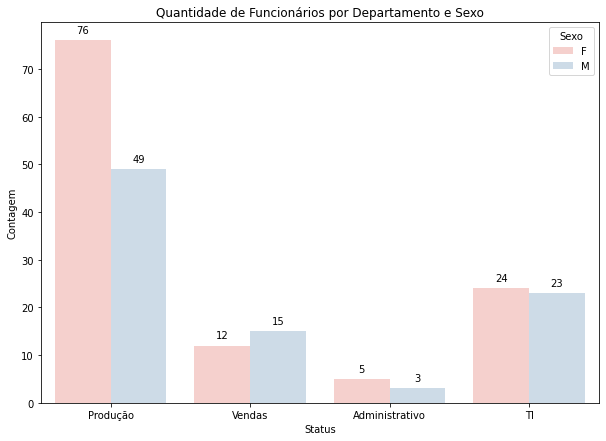

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x=ativos['Departamento'],hue=ativos['Sexo'], palette = current_palette,alpha=.7)
plt.title('Quantidade de Funcionários por Departamento e Sexo')
plt.xlabel('Status')
plt.ylabel('Contagem')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


### Qual é a principal fonte de recrutamento da empresa?

A principal fonte de recrutamento é o Site de Vagas.

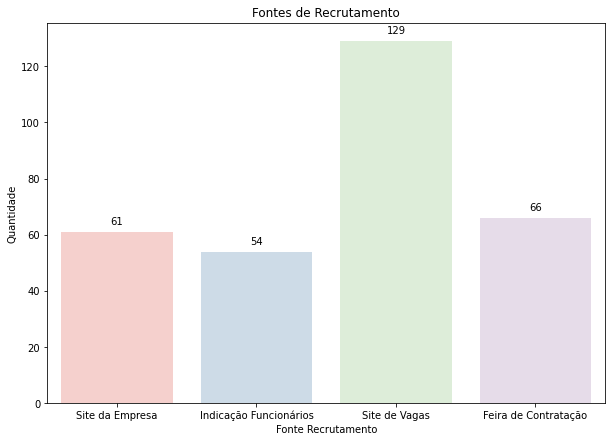

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x=df['Fonte Recrutamento'], palette = current_palette, alpha=0.7)
plt.title('Fontes de Recrutamento')
plt.ylabel('Quantidade')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Dos integrantes qual percentual foi com base em indicação de funcionários?

A fonte de recrutamento por indicação de funcionários foram 54 vezes, correspondendo a 17,41% das fontes de recrutamento.

In [ ]:
recruit = df.groupby('Fonte Recrutamento').agg({'Fonte Recrutamento' : 'count'})
recruit['%'] = recruit['Fonte Recrutamento'] / recruit['Fonte Recrutamento'].sum() *100

recruit.sort_values(by='%', ascending=False)

,Fonte Recrutamento,%
Fonte Recrutamento,,
Site de Vagas,129,41.612903
Feira de Contratação,66,21.290323
Site da Empresa,61,19.677419
Indicação Funcionários,54,17.419355


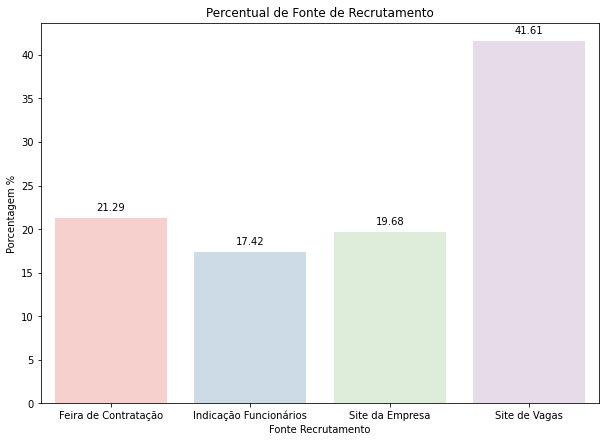

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.barplot(x=recruit.index, y=recruit['%'], palette = current_palette, alpha=.7)
plt.title('Percentual de Fonte de Recrutamento')
plt.ylabel('Porcentagem %')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Com base na última avaliação de performance, qual percentual de funcionários ativos que ficaram abaixo do esperado?

Abaixo do esperado foram 16 funcionários com um percentual de 7,73%

In [ ]:
perf = ativos.groupby('Registro de Performance ').agg({'Registro de Performance ' : 'count'})
perf['%'] = perf['Registro de Performance '] / perf['Registro de Performance '].sum() *100
perf.sort_values(by='%', ascending=False)

,Registro de Performance,%
Registro de Performance,,
Dentro do Esperado,162,78.260870
Acima do Esperado,29,14.009662
Abaixo do esperado,16,7.729469


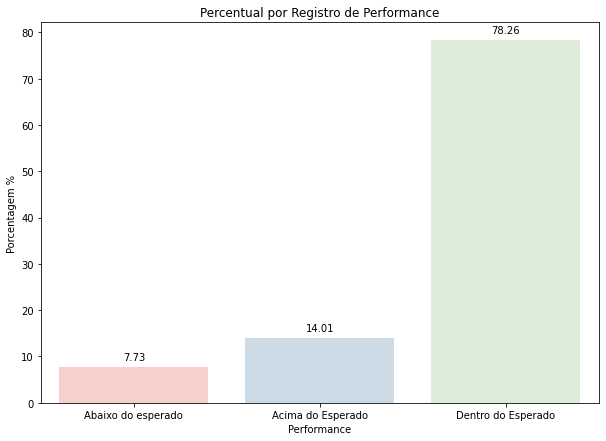

In [ ]:

plt.figure(figsize=(10,7))
splot = sns.barplot(x=perf.index, y=perf['%'], palette = current_palette, alpha=.7)
plt.title('Percentual por Registro de Performance')
plt.xlabel('Performance')
plt.ylabel('Porcentagem %')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


### Dos profissionais ativos, qual é a média de tempo em anos que trabalham nesta empresa?

Considerando o ano de hoje e os funcionários que ainda estão ativos, a média de tempo dos funcionários ativos é de 3,82 anos

In [ ]:
now.year - ativos['Data de Contratação'].dt.year.mean()


3.821256038647334

### Qual departamento representou maior grau de satisfação na última pesquisa realizada?

Realizando a média, dos funcionários ativos, o maior índice de satistação foi o Departamento de TI

In [ ]:
depart = ativos.groupby('Departamento')['Índice de Satisfação'].mean().sort_values(ascending=False).reset_index()
depart

,Departamento,Índice de Satisfação
0,TI,4.042553
1,Vendas,3.888889
2,Produção,3.823200
3,Administrativo,3.500000


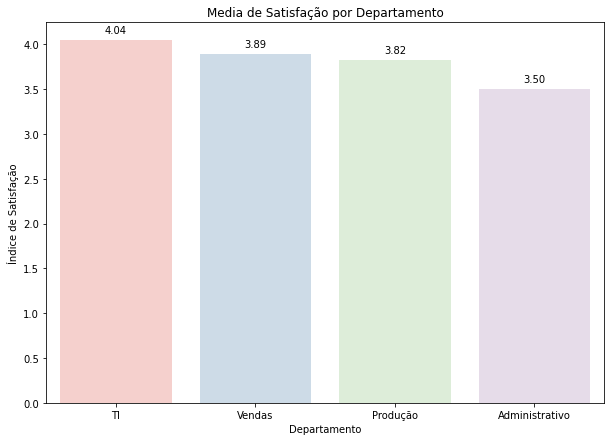

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.barplot(x=depart['Departamento'], y=depart['Índice de Satisfação'], palette = current_palette, alpha=.7)
plt.title('Media de Satisfação por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Índice de Satisfação')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


Text(0.5, 1.0, 'Media de Satisfação por Cargo')

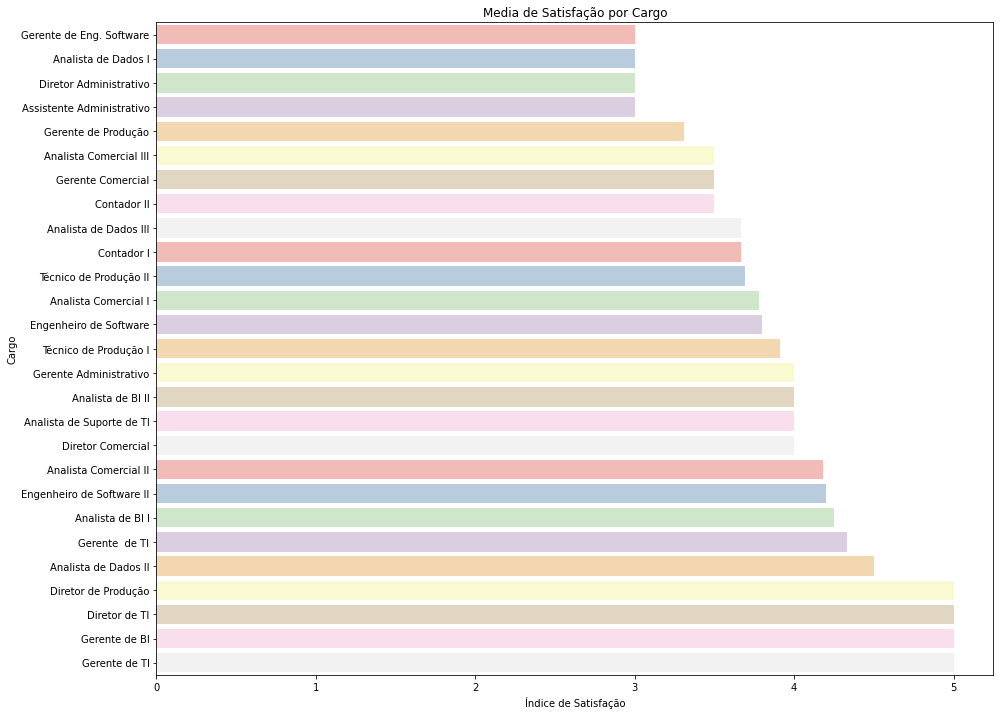

In [ ]:
satisfacao = ativos.groupby('Cargo')['Índice de Satisfação'].mean().sort_values().reset_index()
plt.figure(figsize=(15,12))
sns.barplot(y=satisfacao["Cargo"], x=satisfacao['Índice de Satisfação'], data=satisfacao, palette = current_palette)
plt.title('Media de Satisfação por Cargo')

### Podemos afirmar que existe uma correlação entre o índice de satisfação dos funcionários com o salário?

Não, não possui correlação

In [ ]:
df[['Índice de Satisfação','Salário Mensal Corrigido']].corr(method='pearson')

,Índice de Satisfação,Salário Mensal Corrigido
Índice de Satisfação,1.000000,0.042879
Salário Mensal Corrigido,0.042879,1.000000


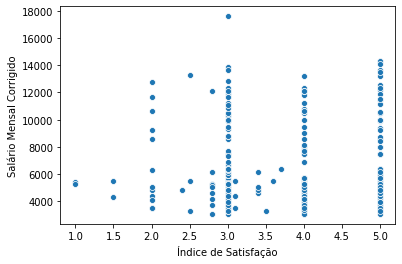

In [ ]:
sns.scatterplot(x= 'Índice de Satisfação', y ='Salário Mensal Corrigido', data=df)

# DESLIGAMENTOS
- Quantas pessoas foram desligadas do quadro de funcionários da empresa de 2016 a 2019? Dessas pessoas quantas foram demitidas e quantas solicitaram o desligamento?

- Dos funcionários que solicitaram desligamento, quais foram as justificativas e seus respectivos percentuais?

- Com base nas solicitações de desligamento, você acredita que existe algum problema específico em algum determinado departamento? Descreva brevemente sua análise.

- Existe algum registro de demissão de pessoas com performance acima do esperado? Qual a justificativa? 

- A empresa tem perdido funcionários com performance acima do esperado? Na sua opinião qual principal motivo? Qual sua sugestão para contornar essa situação?


### Quantas pessoas foram desligadas do quadro de funcionários da empresa de 2016 a 2019? Dessas pessoas quantas foram demitidas e quantas solicitaram o desligamento?

Foram desligadas 103 pessoas, sendo 79 "Solicitou Desligamento" e 24 "Demitidos"

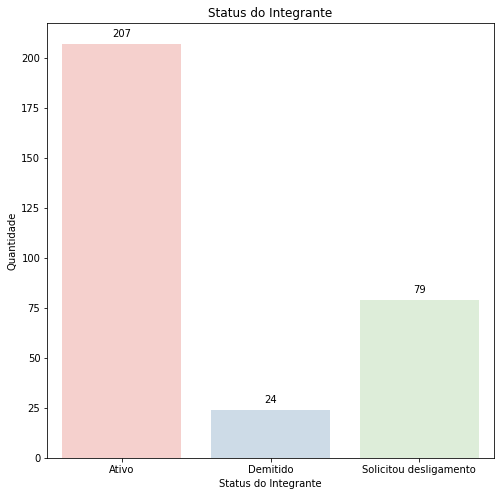

In [ ]:
plt.figure(figsize=(8,8))
splot = sns.countplot(x=df['Status do Integrante'], palette = current_palette, alpha=.7)
plt.title('Status do Integrante')
plt.ylabel('Quantidade')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Dos funcionários que solicitaram desligamento, quais foram as justificativas e seus respectivos percentuais?

O maior desligamento foi por infelicidade, sendo 40 funcionários correspondendo a 50,63%.

In [ ]:
deslig = desligamento.groupby('Motivo Saída').agg({'Motivo Saída':'count'})
deslig['%'] = deslig['Motivo Saída'] / deslig['Motivo Saída'].sum() *100
deslig.head()

,Motivo Saída,%
Motivo Saída,,
Infeliz,40,50.632911
Mudança de Carreira,31,39.240506
Proposta do Concorrente,8,10.126582


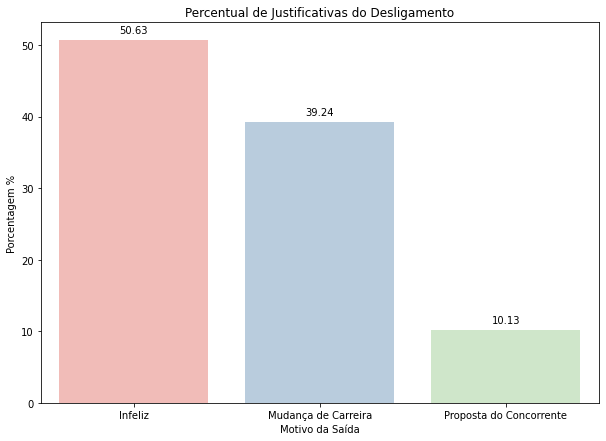

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.barplot(x=deslig['Motivo Saída'].index, y= deslig['%'], palette = current_palette)
plt.title('Percentual de Justificativas do Desligamento')
plt.xlabel('Motivo da Saída')
plt.ylabel('Porcentagem %')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Com base nas solicitações de desligamento, você acredita que existe algum problema específico em algum determinado departamento? Descreva brevemente sua análise.

A quantidade maior dos desligamentos foram no Departarmento de Produção, sendo 37 por motivo de infelicidade, e 25 por motivo de mudança de carreira e 7 por proposta do concorrente.

O Turnover da empresa está alto devido a este Departamento.

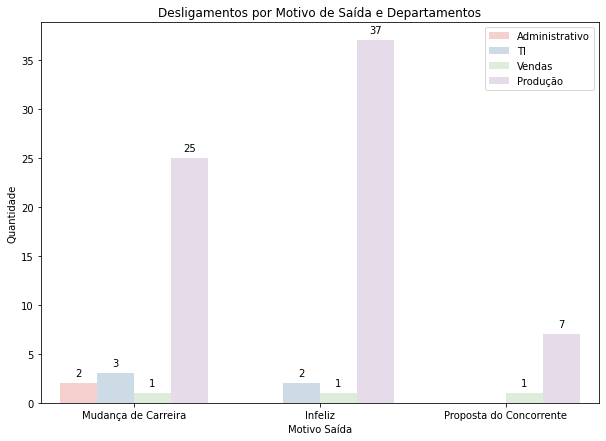

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(hue=desligamento['Departamento'], x=desligamento['Motivo Saída'], palette = current_palette, alpha=.7)
plt.title('Desligamentos por Motivo de Saída e Departamentos')
plt.xlabel('Motivo Saída')
plt.ylabel('Quantidade')
plt.legend(loc='upper right')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

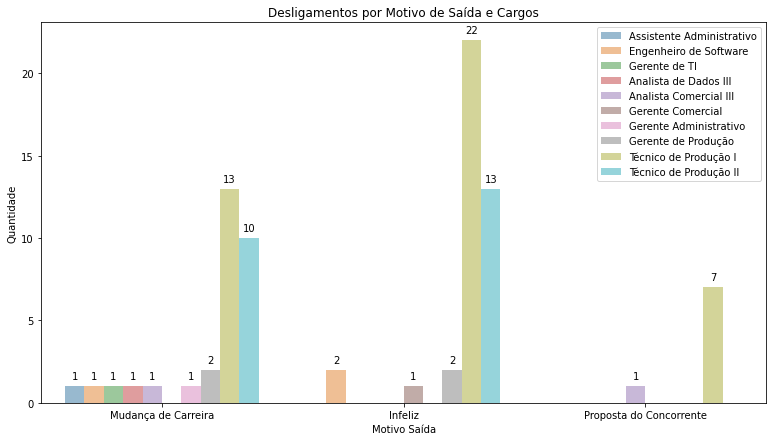

In [ ]:
plt.figure(figsize=(13,7))
splot = sns.countplot(hue=desligamento['Cargo'], x=desligamento['Motivo Saída'], alpha=.5)
plt.title('Desligamentos por Motivo de Saída e Cargos')
plt.xlabel('Motivo Saída')
plt.ylabel('Quantidade')
plt.legend(loc='upper right')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Existe algum registro de demissão de pessoas com performance acima do esperado? Qual a justificativa?

Sim, 1 funcionário Técnico de Produção I, foi demitido e tinha a performance acima do esperado.

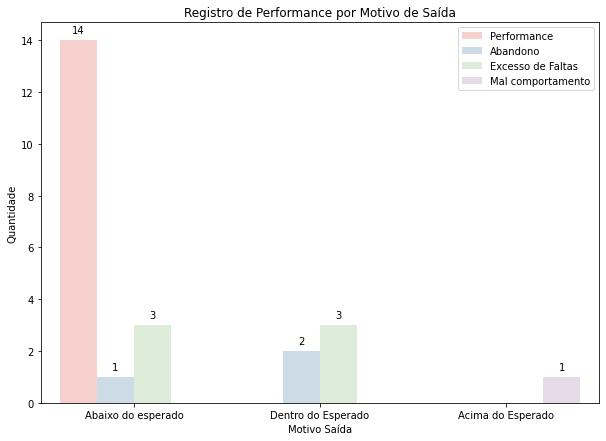

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x=demitido['Registro de Performance '], hue=demitido['Motivo Saída'], palette = current_palette, alpha=.7)
plt.legend(loc='upper right')
plt.title('Registro de Performance por Motivo de Saída')
plt.xlabel('Motivo Saída')
plt.ylabel('Quantidade')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

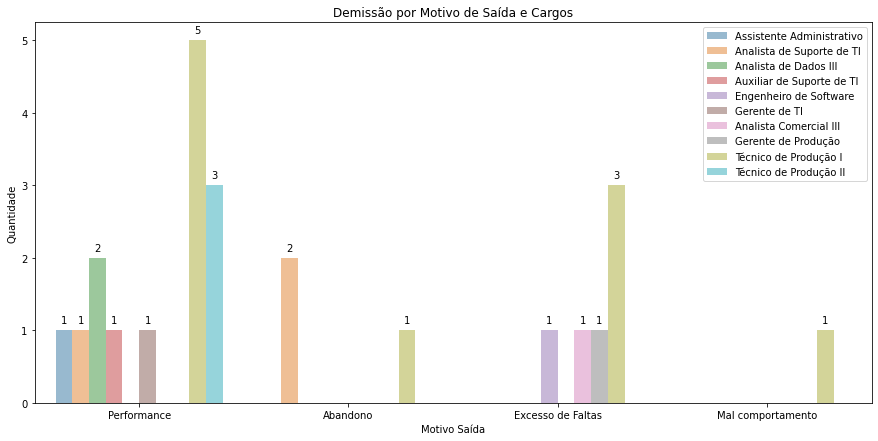

In [ ]:
plt.figure(figsize=(15,7))
splot = sns.countplot(hue=demitido['Cargo'], x=demitido['Motivo Saída'], alpha=.5)
plt.title('Demissão por Motivo de Saída e Cargos')
plt.xlabel('Motivo Saída')
plt.ylabel('Quantidade')
plt.legend(loc='upper right')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### A empresa tem perdido funcionários com performance acima do esperado? Na sua opinião qual principal motivo? Qual sua sugestão para contornar essa situação?

Nas tabelas abaixo, podemos perceber que a empresa perdeu 7 funcionários com performance acima do esperado todos eles do Departamento de Produção, sendo 5 por infelicidade e 2 por mudança de carreira

A empresa poderia realizar uma ação de feedback dos funcionários para indentificar quais são as razões de suas infelicidades.

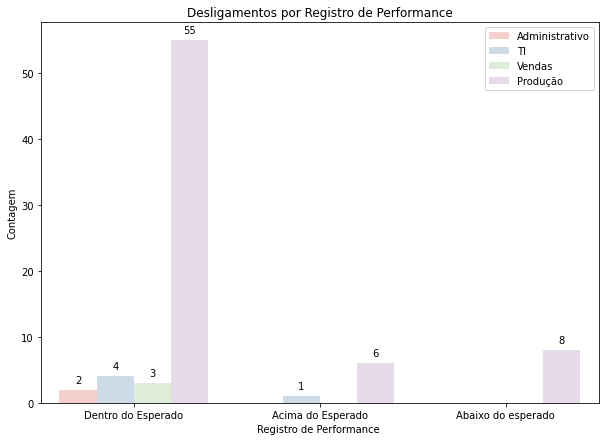

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x=desligamento['Registro de Performance '], hue=desligamento['Departamento'], palette = current_palette, alpha=.7)
plt.legend(loc='upper right')
plt.title('Desligamentos por Registro de Performance')
plt.ylabel('Contagem')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

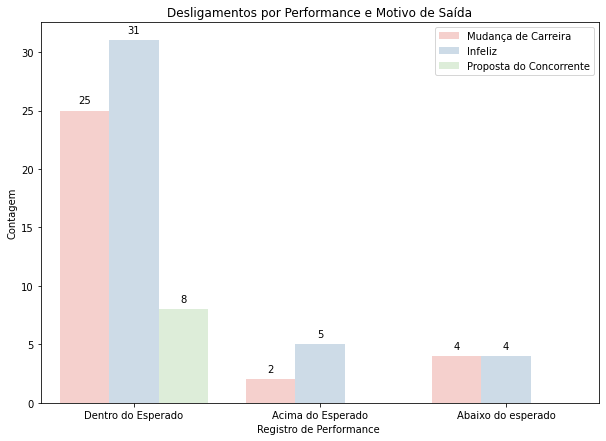

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x=desligamento['Registro de Performance '], hue=desligamento['Motivo Saída'], palette = current_palette, alpha=.7)
plt.legend(loc='upper right')
plt.title('Desligamentos por Performance e Motivo de Saída')
plt.ylabel('Contagem')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# SUGESTÕES E PLANO DE AÇÃO
- Cruzando as informações de performance dos funcionários com a fonte de recrutamento, você priorizaria alguma forma de contratação na empresa? (Ex.: preferências por contratação de profissionais indicados.)
- Existe algum dado que mostra de forma preventiva a possibilidade de saída de algum funcionário? Se sim, como você chegou a essa conclusão? 
- No seu ponto de vista, os departamentos da empresa possuem distribuições salariais equivalentes? 
- O que você faria para reduzir o turnover dessa empresa?
- Quais informações adicionais você sugeriria, para a empresa monitorar análises futuras? 


## Cruzando as informações de performance dos funcionários com a fonte de recrutamento, você priorizaria alguma forma de contratação na empresa? (Ex.: preferências por contratação de profissionais indicados.)

Pessoas contratadas na Feira de Contratação tem otimos indices 'Acima do Esperado', e bons resultados "Dentro do Esperado', mas nenhum 'Abaixo do esperado'.

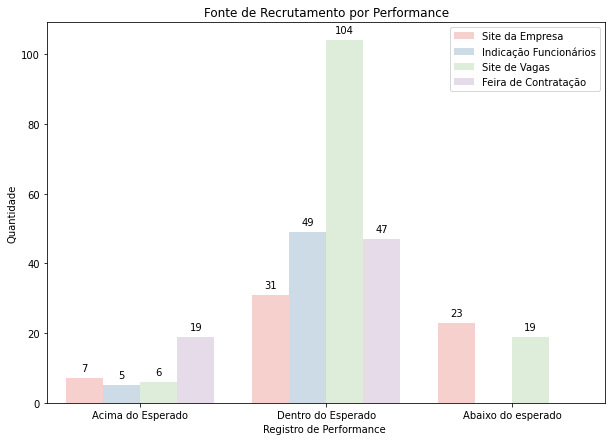

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.countplot(x=df['Registro de Performance '], hue=df['Fonte Recrutamento'], palette = current_palette, alpha=.7)
plt.legend(loc='upper right')
plt.title('Fonte de Recrutamento por Performance')
plt.ylabel('Quantidade')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## No seu ponto de vista, os departamentos da empresa possuem distribuições salariais equivalentes?

Existe uma distribuição salarial diferente para o Sexo Masculino e Feminino para o mesmo cargo. 

O menor salário é do departamento da produção.

Distribuição dos salários da empresa

Text(0.5, 1.0, 'Distribuição dos salários da empresa')

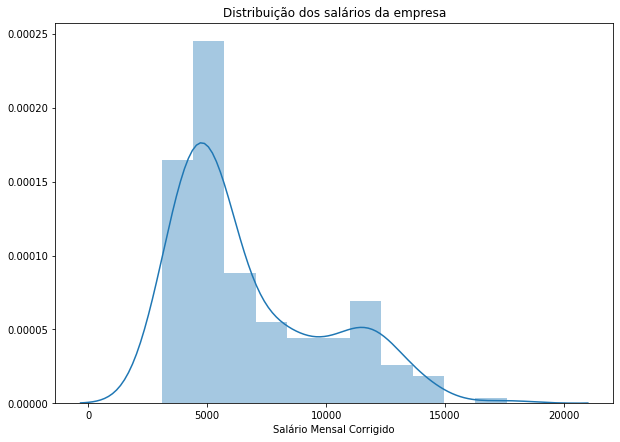

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(ativos['Salário Mensal Corrigido'])
plt.title('Distribuição dos salários da empresa')

Média de salário mensal por Departamento

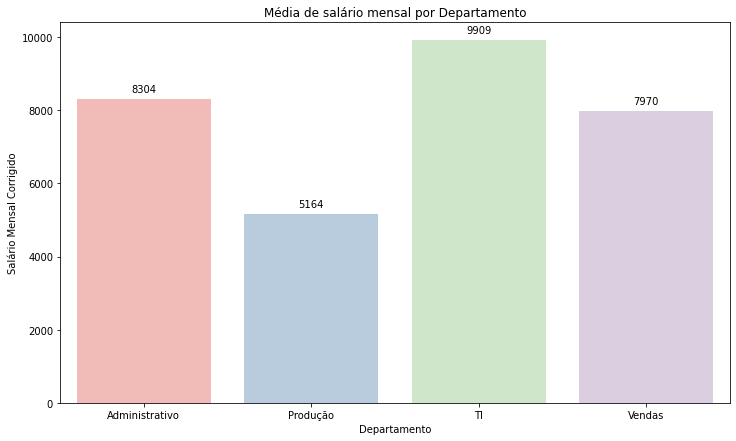

In [ ]:
plt.figure(figsize=(12,7))
splot = sns.barplot(x='Departamento', y= 'Salário Mensal Corrigido', data=ativos.groupby('Departamento')['Salário Mensal Corrigido'].mean().reset_index(), palette = current_palette)
plt.title('Média de salário mensal por Departamento')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Mediana de sálario mensal por Departamento

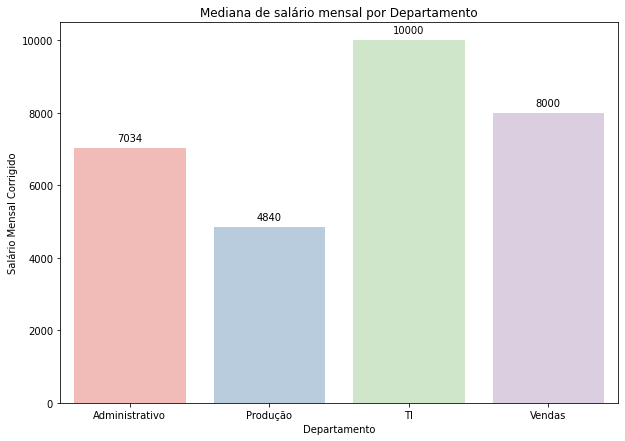

In [ ]:
plt.figure(figsize=(10,7))
splot = sns.barplot(x='Departamento', y= 'Salário Mensal Corrigido', data=ativos.groupby('Departamento')['Salário Mensal Corrigido'].median().reset_index(), palette = current_palette)
plt.title('Mediana de salário mensal por Departamento')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Text(0.5, 1.0, 'Média de salário mensal por Departamento e Sexo')

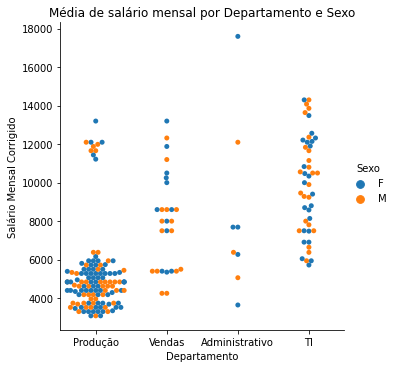

In [ ]:

sns.catplot(y='Salário Mensal Corrigido', x='Departamento', hue='Sexo',kind='swarm', data=ativos)
plt.title('Média de salário mensal por Departamento e Sexo')

Boxplot dos salários por Departamento

Text(0.5, 1.0, 'Boxplot dos Salários por Departamento')

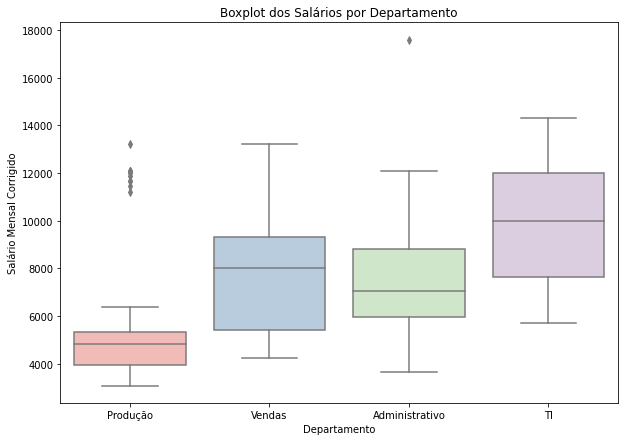

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Departamento", y="Salário Mensal Corrigido", data=ativos, palette = current_palette)
plt.title('Boxplot dos Salários por Departamento')

Boxplot dos salários por Departamento e Sexo

Text(0.5, 1.0, 'Boxplot dos Salários por Departamento e Sexo')

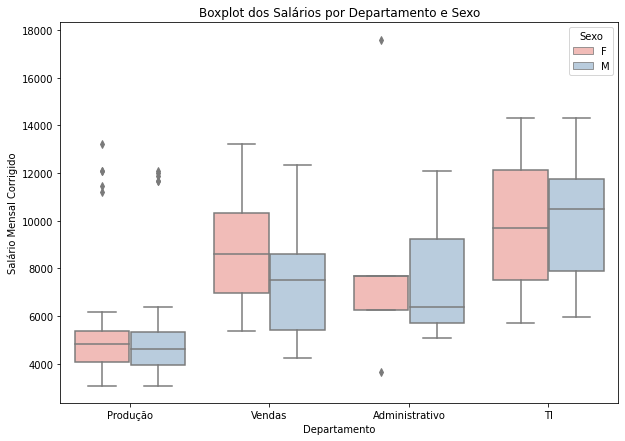

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Departamento", y="Salário Mensal Corrigido", hue='Sexo', data=ativos, palette = current_palette)
plt.title('Boxplot dos Salários por Departamento e Sexo')

Text(0.5, 1.0, 'Boxplot dos Salários por Cargo e Sexo')

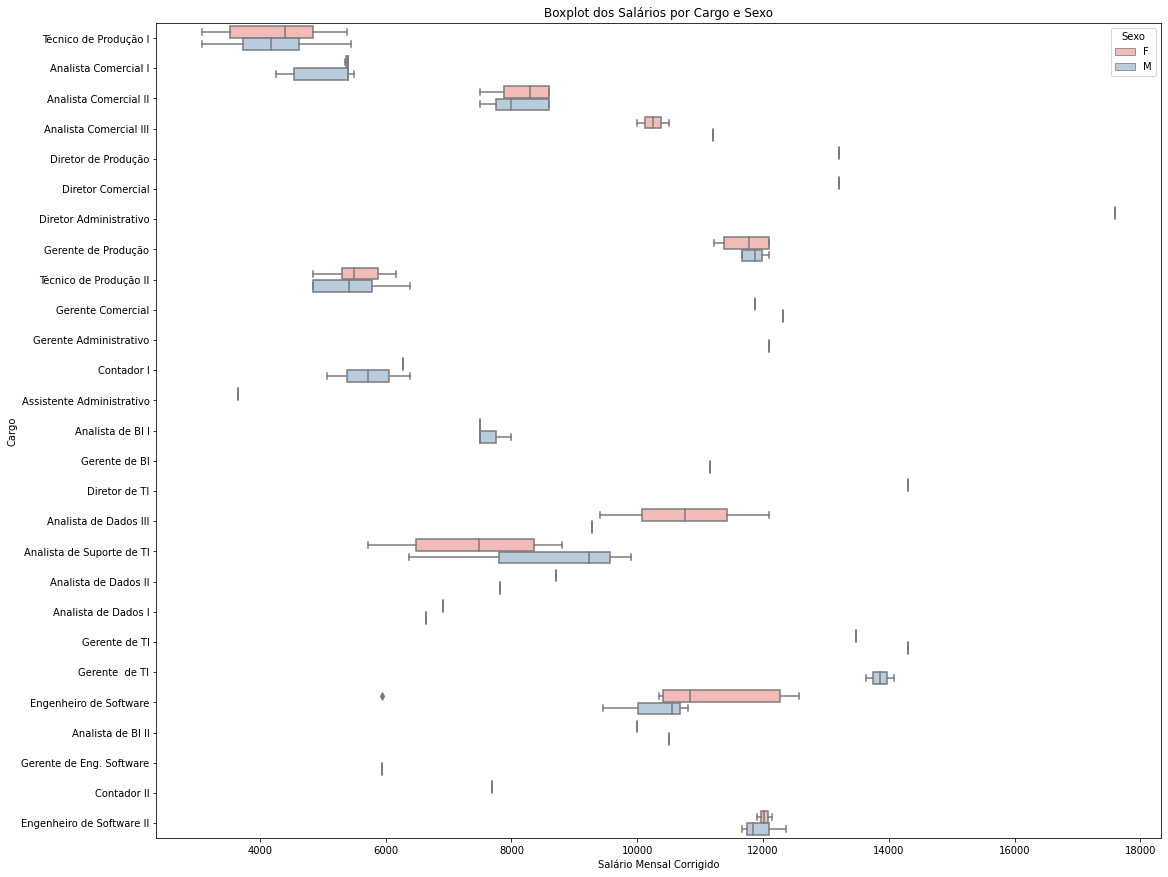

In [ ]:
plt.figure(figsize=(18,15))
sns.boxplot(y="Cargo", x="Salário Mensal Corrigido", hue='Sexo', data=ativos, palette = current_palette)
plt.title('Boxplot dos Salários por Cargo e Sexo')

In [ ]:
order = ativos.groupby('Cargo')['Salário Mensal Corrigido'].sum().reset_index().sort_values('Cargo')
order.head()

,Cargo,Salário Mensal Corrigido
0,Analista Comercial I,46350
1,Analista Comercial II,89500
2,Analista Comercial III,41950
3,Analista de BI I,30500
4,Analista de BI II,31000


Text(0.5, 1.0, ' Salários por Cargo e Sexo')

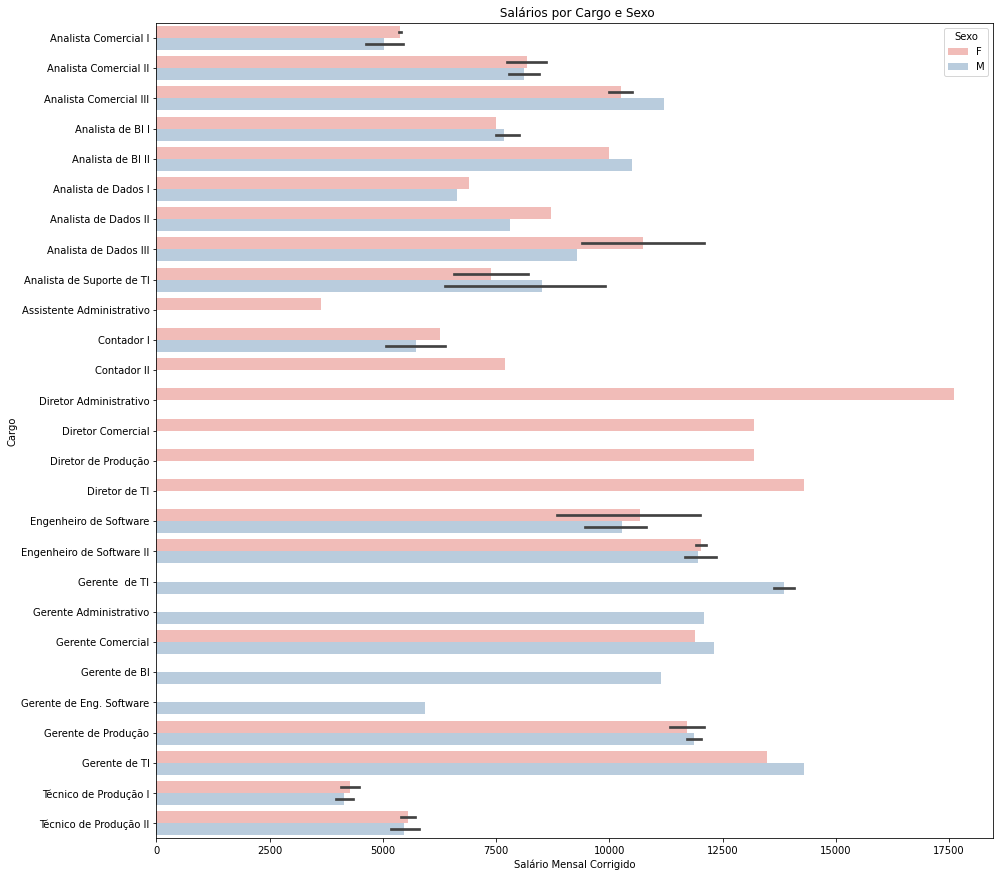

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(y="Cargo", x="Salário Mensal Corrigido", hue='Sexo', data=ativos, palette = current_palette, order=order['Cargo'])
plt.title(' Salários por Cargo e Sexo')

Text(0.5, 1.0, ' Salários por Cargo e Sexo')

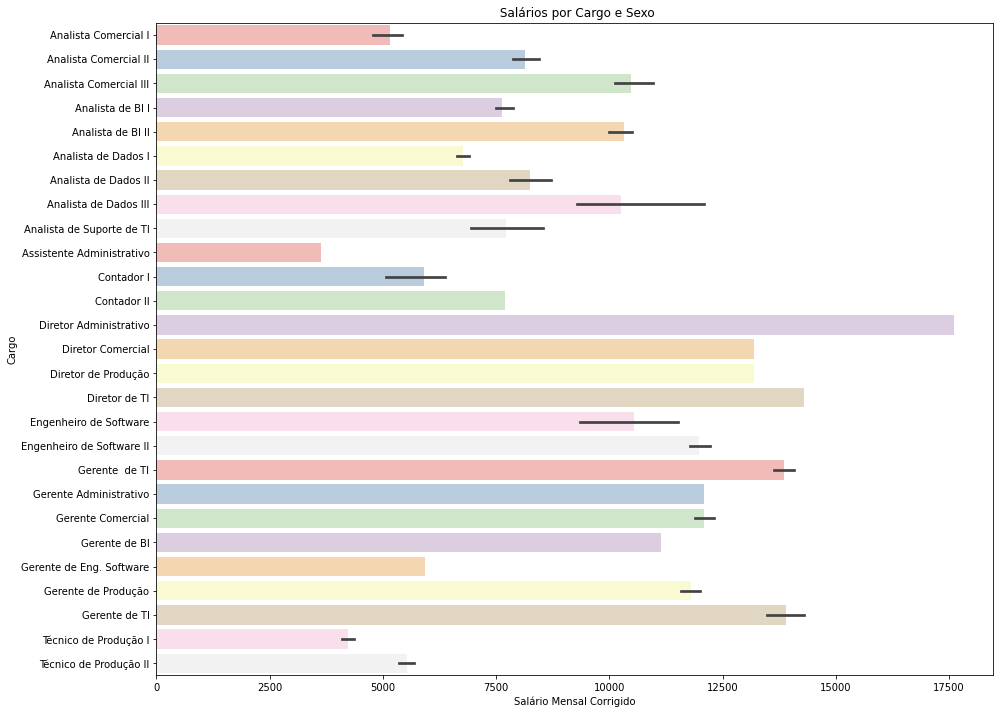

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(y="Cargo", x="Salário Mensal Corrigido", data=ativos, palette = current_palette, order=order['Cargo'])
plt.title(' Salários por Cargo e Sexo')

## Existe algum dado que mostra de forma preventiva a possibilidade de saída de algum funcionário? Se sim, como você chegou a essa conclusão?

Abaixo realizo a predição da possibilidade de saída. 

Foi utilizado o algoritmo de Machine Learning (DecisionTreeClassifier). Onde houve uma precisão de 78%.

As colunas utilizadas foram: 'Salário Mensal Corrigido', 'Cargo', 'Status do Integrante', 'Registro de Performance ', 'Pesquisa de Engajamento', 'Índice de Satisfação'.

### Tratando os dados

Copiando os dados do dataset original

In [4]:
rh = df.copy()

Após alguns testes usando o algoritimo de Machine Learning DecisionTreeClassifier, identifiquei as colunas que estão sendo mais utilizadas no modelo, então, abaixo deleto do DataFrame as colunas que não serão utilizadas.

A coluna 'Motivo Saída' estava realizando Data Leakage que significa:
"quando informações de fora do conjunto de dados de treinamento são usadas para criar o modelo".

Ou seja, com a coluna "motivo da saida", o modelo estava excessivamente otimistas chegando a 100%, mas como a intenção é prever a possibilidade de saída, esta coluna estáva contando para o modelo que a pessoa já saiu da empresa.

In [5]:
rh = rh.drop(['SpecialProjectsCount', 'Fonte Recrutamento','Departamento','Estado Civil','Sexo', 'PerfScoreID','ID','Nome do Empregado','Data de Saída','Última atualização de Performance','Motivo Saída','Data de Nascimento','Data de Contratação'], axis = 1)

Como a intenção é identificar a saída de algum funcionario, juntei todos os "Solicitou desligamento e o "Demitido" para DESLIGADO

In [ ]:
rh['Status do Integrante'] = rh['Status do Integrante'].replace(['Solicitou desligamento', 'Demitido'], 'Desligado')

### LabelEnconder

Abaixo aplico o LabelEnconder que transforma as colunas categoricas para números

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Features = rh
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

### DecisionTree

Separando os dados em target e classe


In [ ]:
X = rh.drop('Status do Integrante', axis=1)
y = rh['Status do Integrante']

Separando 25% dos dados para o teste do modelo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Creating the classiffier and fitting the Decision Tree to the Training Set:
classifier = DecisionTreeClassifier(criterion= 'entropy',max_depth= 4)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
resultado = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        53
           1       0.74      0.56      0.64        25

    accuracy                           0.79        78
   macro avg       0.78      0.73      0.75        78
weighted avg       0.79      0.79      0.79        78



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.98 %
Standard Deviation: 3.35 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring='precision')
print("Precision: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Precision: 60.33 %
Standard Deviation: 9.68 %


## O que você faria para reduzir o turnover dessa empresa?

De acordo com a análise, a taxa de desligamento está alta no setor de produção, para os cargos de Gerentes de Produção e Técnico de Produção I e II, por infelicidade ou mudança de carreira.


O turnover da empresa está alto devido ao Setor de Produção onde houve 83 funcionários que sairam da empresa sendo:

- Gerentes de Produção: 
 - Demissão: 1 por excesso de faltas
 - Desligamento : 2 Infelizes e 2 por Mudança de Carreira.
 
- Técnicos de Produção:
 - Demissão: 8 por Performance, 1 abandono, 3 excesso de faltas e 1 Mal comportamento
 - Desligamento: 35 por infelicidade , 23 por mudança de carreira e 7 por proposta recorrente.



Com a rotatividade dos Gerentes de Produção, devido as mudanças de gerência, podem ter afetado nos cargos de Técnico de Produção onde varias pessoas solicitaram desligamento.

Na ánalise, podemos perceber que o **Diretor de Produção**, mesmo com a rotatividade tão alta em seus subordinados e em seu Departamento de Produção, ele avalia como Índice de Satisfação Máximo.

Para reduzir o Turnover, é necessário realizar ações para corrigir a rotatividade dos cargos de Gerentes de Produção e Técnicos de Produção, e também avaliar a liderança do Diretor de Produção.



Text(0.5, 1.0, 'Desligamento por Cargo e Data')

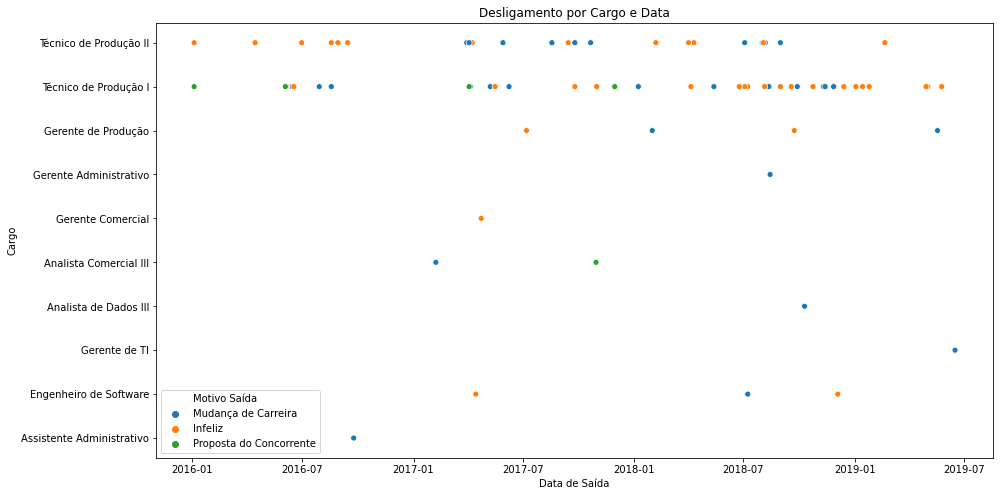

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=desligamento['Data de Saída'], y=desligamento['Cargo'], hue=desligamento['Motivo Saída'])
plt.title('Desligamento por Cargo e Data')

## Quais informações adicionais você sugeriria, para a empresa monitorar análises futuras?

- Realizar uma pesquisa de clima organizacional, com opções de se avaliar:
 - liderança,
 - estrutura de trabalho,
 - remuneração, 
 - comunicação, 
 - Gestão de pessoas para identificar o real motivo da infelicidade e poder traçar um plano de ação junto ao RH.

- Nas entrevistas de desligamento, onde se aponta o motivo, que seja também mais específico os motivos da infelicidade

- Avaliação de desempenho 360º onde as competências das lideranças serão avaliadas

- Indentificação por grau do cargo (Júnior, Pleno, Sênior)

- Verificar se existe algum funcionário responsável pela área de gestão de pessoas. Se não houver, verificar a possibilidade da contratação ou de uma consultoria para aplicação de ferramentas de gestão de pessoas como pesquisa de clima, avaliação de desempenho.